In [1]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

Missing fabio module. Please install it if you need open some tiff images from the sCMOS camera
LaueToolsProjectFolder ..\lauetools\LaueTools
you are using python 3


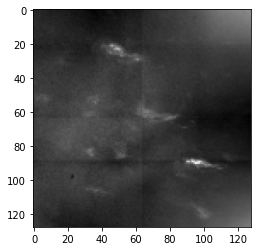

In [15]:

nx,ny=64,64#146

features=np.load('features16384.npy')[:nx,60:60+ny,:]

X = np.reshape(features, (nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=256)#,linkage='complete')

agglo.fit(X)
FA_features=agglo.transform(X)
RS_features = agglo.inverse_transform(FA_features)
RS_features=RS_features.reshape((nx*ny,128,128))
plt.imshow(X[0].reshape((128,128)),cmap='gray')

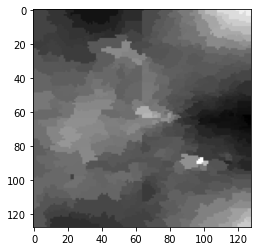

In [16]:
plt.imshow(RS_features[0].reshape((128,128)),cmap='gray')


In [19]:
X = np.zeros((nx,ny,16384))
for i in range(nx):
    for j in range(ny):
        X[i,j]=fft.dstn(features[i,j].reshape((128,128))).ravel()
X=np.reshape(X,(nx*ny,16384))

connectivity = grid_to_graph(n_x=128, n_y=128)

agglo2 = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=256)#,linkage='complete')

agglo2.fit(X)
FA_features=agglo2.transform(X)

RS_features = agglo2.inverse_transform(FA_features)
RS_features=RS_features.reshape((nx*ny,128,128))

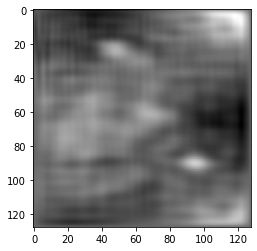

In [20]:
plt.imshow(fft.idstn(RS_features[0].reshape((128,128))),cmap='gray')
